<a href="https://colab.research.google.com/github/FireStrings/MasterDegree/blob/main/LSTM/LSTM_Runner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

_dir = "/content/drive/My Drive/UFSCAR/Notebooks/LSTM"

import os
os.chdir(_dir)

Mounted at /content/drive/


### Imports

In [ ]:
%run LSTM.ipynb

Mounted at /content/drive/


In [ ]:
pd.set_option('display.max_rows', 100)

In [ ]:
lista_estacoes = ["campo_grande", "curitiba", "manaus", "minas_gerais_gv", "teresina", "pelotas", "brasilia", "minas_gerais_bh"]
janela_tempo = 11
results_lstm = {}
results_bilstm = {}
op = "results"

In [ ]:
if op == "results":
  list_df_results = []
  for estacao in lista_estacoes:
      results_lstm = manage_results(_dir+"/last_results/" + estacao + "_lstm.pkl", "read")
      results_bilstm = manage_results(_dir+"/last_results/" + estacao + "_bilstm.pkl", "read")


      list_df_results.append(create_table_results(estacao, "lstm", results_lstm[estacao]))
      list_df_results.append(create_table_results(estacao, "bilstm", results_bilstm[estacao]))

  df_final = pd.concat(list_df_results, axis=0)

elif op == "train":
  for estacao in lista_estacoes:
      anual_df = load_and_filter(estacao, 7, 18).set_index("data_hora")

      train_size = int(0.7 * (round(len(anual_df)/10)*10))

      train_df = anual_df.iloc[0:train_size]
      test_df = anual_df.iloc[train_size:]

      results_lstm[estacao] = {}
      results_bilstm[estacao] = {}

      # LSTM
      process_lstm(5, estacao, train_df, test_df, results_lstm, True, False, False)
      manage_results(_dir+"/last_results/" + estacao + "_lstm.pkl", "write", results_lstm)

      # BiLSTM
      process_lstm(5, estacao, train_df, test_df, results_bilstm, True, True, False)
      manage_results(_dir+"/last_results/" + estacao + "_bilstm.pkl", "write", results_bilstm)

In [ ]:
df_final.groupby(level=[0, 1]).mean().reset_index()

,estacao,tipo_rede,mse,rmse,mae,r2
0,brasilia,bilstm,0.205619,0.453388,0.274127,0.788021
1,brasilia,lstm,0.175209,0.418559,0.253220,0.815373
2,campo_grande,bilstm,0.158637,0.398187,0.262612,0.834650
3,campo_grande,lstm,0.138899,0.372603,0.240139,0.855612
4,curitiba,bilstm,0.170401,0.412745,0.275789,0.790528
5,curitiba,lstm,0.142613,0.377583,0.247452,0.826455
6,manaus,bilstm,0.210219,0.458400,0.309507,0.739022
7,manaus,lstm,0.182549,0.427186,0.284732,0.769251
8,minas_gerais_bh,bilstm,0.124073,0.352201,0.229690,0.856883
9,minas_gerais_bh,lstm,0.104911,0.323864,0.209877,0.873429


###Test with StandardScaler

In [ ]:
estacao = "teresina"
results_lstm_old = {} #Usando divisão por 1000
results_lstm_new = {} #Usando StandardScaler
janela_tempo = 11

anual_df = load_and_filter(estacao, 7, 18).set_index("data_hora")

train_size = int(0.7 * (round(len(anual_df)/10)*10))

train_df = anual_df.iloc[0:train_size]
test_df = anual_df.iloc[train_size:]

results_lstm_old[estacao] = {}
results_lstm_new[estacao] = {}

process_lstm(5, estacao, train_df, test_df, results_lstm_old, True, False, False, False)
process_lstm(5, estacao, train_df, test_df, results_lstm_new, True, False, False, True)

Starting process 0 for station teresina with LSTM type
Starting process 1 for station teresina with LSTM type
Starting process 2 for station teresina with LSTM type
Starting process 3 for station teresina with LSTM type
Starting process 4 for station teresina with LSTM type
Starting process 0 for station teresina with LSTM type
Starting process 1 for station teresina with LSTM type
Starting process 2 for station teresina with LSTM type
Starting process 3 for station teresina with LSTM type
Starting process 4 for station teresina with LSTM type


In [ ]:
for i in range(0, 5):
    old = results_lstm_old["teresina"][i]["metrics"]["r2"]
    new = results_lstm_new["teresina"][i]["metrics"]["r2"]
    print("Old: ", old, "New: ", new)

Old:  0.8861341896603656 New:  0.8865477219617016
Old:  0.8872627784520708 New:  0.885848339187911
Old:  0.8849413117671076 New:  0.885848417322991
Old:  0.8902139102809192 New:  0.8837936346235575
Old:  0.8860637661408061 New:  0.8893742668455914


In [ ]:
list_df_results = []

list_df_results.append(create_table_results(estacao, "lstm_div_1000", results_lstm_old[estacao]))
list_df_results.append(create_table_results(estacao, "lstm_std_scaler", results_lstm_new[estacao]))

df_final = pd.concat(list_df_results, axis=0)

In [ ]:
df_final

mse      rmse       mae        r2
estacao  tipo_rede       execucao                                        
teresina lstm_div_1000   1         0.067122  0.259080  0.170807  0.886134
                         2         0.063283  0.251560  0.162330  0.887263
                         3         0.068334  0.261407  0.161676  0.884941
                         4         0.062818  0.250635  0.158698  0.890214
                         5         0.069586  0.263791  0.169585  0.886064
         lstm_std_scaler 1         0.102368  0.319950  0.202776  0.886548
                         2         0.100644  0.317245  0.202509  0.885848
                         3         0.100768  0.317440  0.209835  0.885848
                         4         0.101004  0.317811  0.205466  0.883794
                         5         0.099256  0.315049  0.204028  0.889374

In [ ]:
df_final_2 = pd.DataFrame(df_final.reset_index().values, columns=["estacao", "tipo_rede", "execucao", "mse", "rmse", "mae", "r2"])

<Axes: xlabel='execucao', ylabel='r2'>

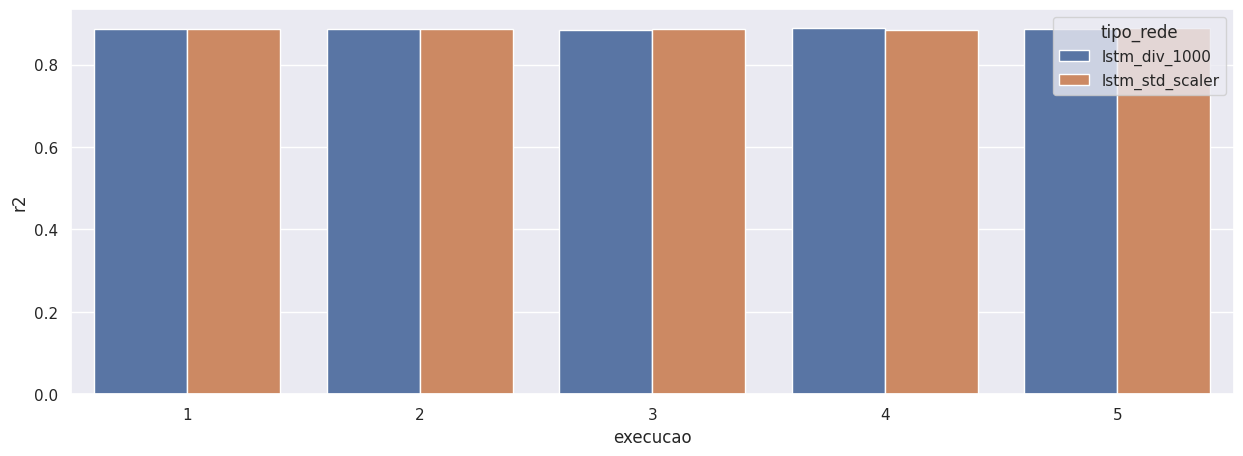

In [ ]:
set_plot_size(15, 5)
sns.barplot(x="execucao", y="r2", data=df_final_2, hue="tipo_rede")

<Axes: xlabel='execucao', ylabel='mse'>

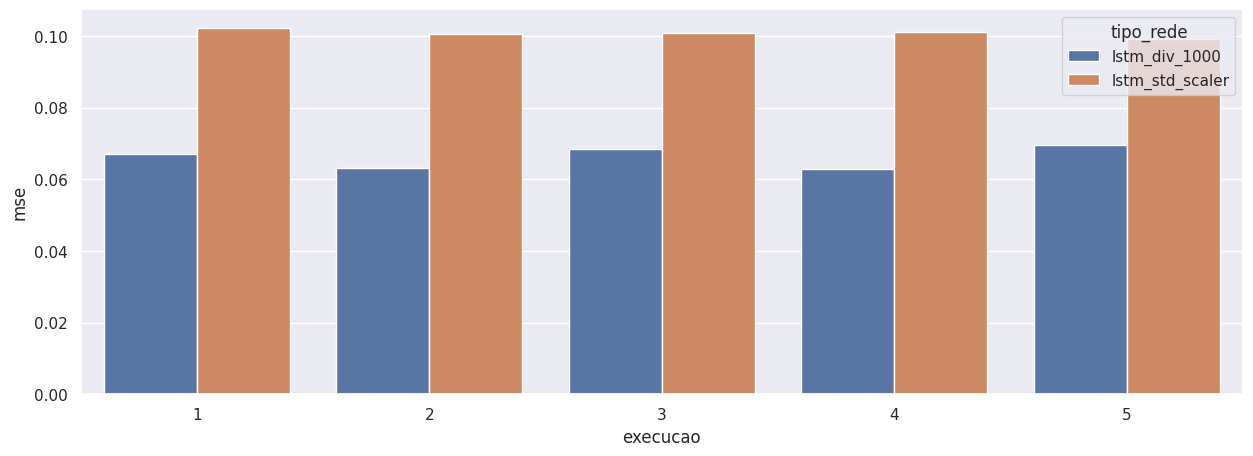

In [ ]:
sns.barplot(x="execucao", y="mse", data=df_final_2, hue="tipo_rede")

<Axes: xlabel='execucao', ylabel='rmse'>

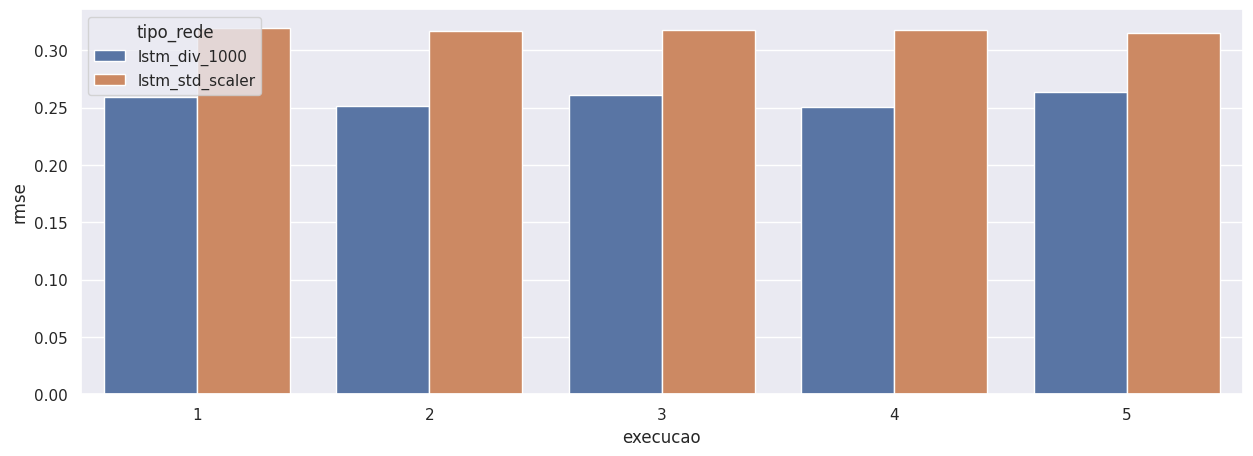

In [ ]:
sns.barplot(x="execucao", y="rmse", data=df_final_2, hue="tipo_rede")

<Axes: xlabel='execucao', ylabel='mae'>

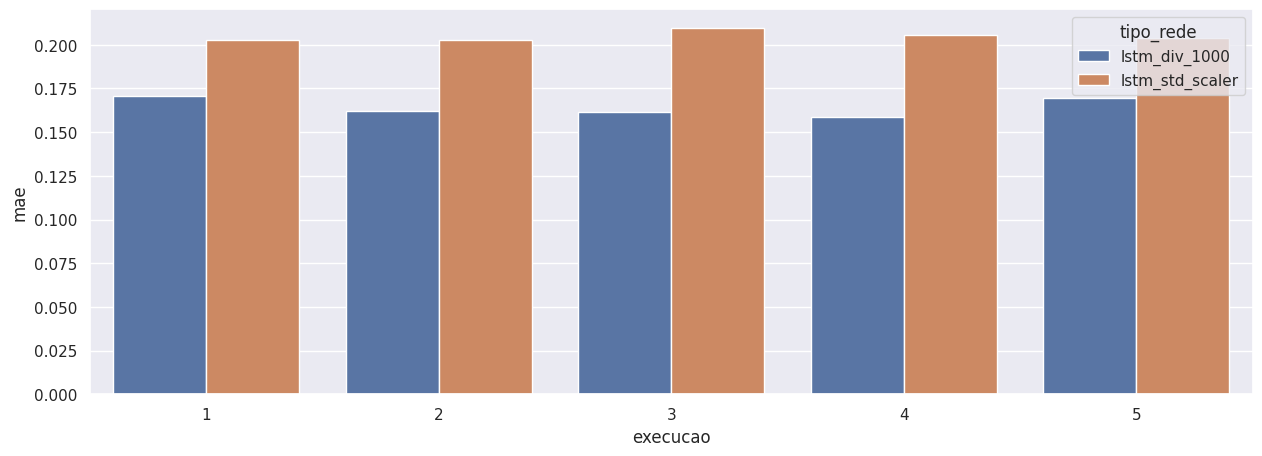

In [ ]:
sns.barplot(x="execucao", y="mae", data=df_final_2, hue="tipo_rede")